In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, log_loss
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

In [2]:
df = pd.read_csv("twitter_data.csv")
print(df)

       Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  
0      !!! RT @m

In [3]:
df['labels'] = df['class'].map({0:"Hate Speech Detected", 1:"Offensive Speech Detected", 2:"No Hate Speech Detected"})
print(df.tail())

       Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  \
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...   
24779  you've gone and broke the wrong heart baby, an...   
24780  young buck wanna eat!!.. dat nigguh like I ain...   
24781              youu got wild bitches tellin you lies   
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...   

                          labels  
24778  Offensive Speech Detected  
24779    No Hate Speech Detected  
24780  Offensive Speech Detected  
24781  Offensive Speech Detected  
2

In [4]:
df = df[['tweet', 'labels']]
df.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate Speech Detected
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Speech Detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Speech Detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Speech Detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Speech Detected


In [5]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?]','',text)
    text = re.sub('http?://\s+|www\.S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '',text)
    text = re.sub('\n', '',text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    return text
df["tweet"] = df["tweet"].apply(clean)
print(df.head())

                                               tweet  \
0   rt mayasolovely woman shouldnt complain clean...   
1   rt  boy dats coldtyga dwn bad cuffin dat hoe ...   
2   rt urkindofbrand dawg rt  ever fuck bitch sta...   
3           rt cganderson vivabased look like tranny   
4   rt shenikaroberts shit hear might true might ...   

                      labels  
0    No Hate Speech Detected  
1  Offensive Speech Detected  
2  Offensive Speech Detected  
3  Offensive Speech Detected  
4  Offensive Speech Detected  


<AxesSubplot: xlabel='labels', ylabel='count'>

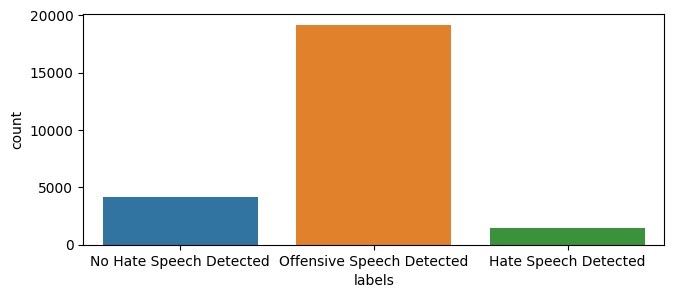

In [6]:
fig = plt.figure(figsize=(7.5,3))
sns.countplot(x='labels', data = df)

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

tweet     0
labels    0
dtype: int64


In [8]:
x = np.array(df['tweet']).flatten()
y = np.array(df['labels'])

cv = CountVectorizer()
x = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, zero_division=1)
print(report)


                           precision    recall  f1-score   support

     Hate Speech Detected       0.34      0.28      0.31       465
  No Hate Speech Detected       0.78      0.80      0.79      1379
Offensive Speech Detected       0.92      0.93      0.92      6335

                 accuracy                           0.87      8179
                macro avg       0.68      0.67      0.67      8179
             weighted avg       0.86      0.87      0.87      8179



In [9]:
test_data= "you are bad i don't like you"
df = cv.transform([test_data]).toarray()
print(model.predict(df))

['Offensive Speech Detected']


In [10]:
 y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test[:y_pred.shape[0]], y_pred)
# #f1 = f1_score(y_test, y_pred)
# logloss = None
# print("Accuracy:", accuracy)
# #print("F1-score: ",f1)
# print("Log Loss: ",logloss)
report = classification_report(y_test, y_pred, zero_division=1)
print(report)

                           precision    recall  f1-score   support

     Hate Speech Detected       0.35      0.29      0.32       465
  No Hate Speech Detected       0.78      0.80      0.79      1379
Offensive Speech Detected       0.92      0.92      0.92      6335

                 accuracy                           0.87      8179
                macro avg       0.68      0.67      0.68      8179
             weighted avg       0.86      0.87      0.86      8179



In [11]:
# X = df['tweet']
# Y = df['labels']

# X = vect.transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [13]:
print("Size of x_train:", (X_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (X_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (19826, 30588)
Size of y_train: (19826,)
Size of x_test:  (4957, 30588)
Size of y_test:  (4957,)


In [14]:
#Applying Knn

In [15]:
# Create and train the KNN classifier
k = 5  # Number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn.predict(X_test)

report = classification_report(y_test, y_pred, zero_division=1)
print(report)

#  Calculate the accuracy of the classifier
# accuracy = accuracy_score(y_test, y_pred)

# print("Accuracy:", accuracy*100)

                           precision    recall  f1-score   support

     Hate Speech Detected       0.38      0.34      0.36       290
  No Hate Speech Detected       0.71      0.67      0.69       835
Offensive Speech Detected       0.90      0.92      0.91      3832

                 accuracy                           0.84      4957
                macro avg       0.66      0.64      0.65      4957
             weighted avg       0.84      0.84      0.84      4957



In [16]:
#applying Logistic Regression

In [17]:
# Create and train the logistic regression classifier
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [18]:
# Predict the labels for the test data
y_pred = logreg.predict(X_test)

report = classification_report(y_test, y_pred, zero_division=1)
print(report)
# Calculate the accuracy of the classifier
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy*100)


                           precision    recall  f1-score   support

     Hate Speech Detected       0.48      0.24      0.32       290
  No Hate Speech Detected       0.84      0.85      0.84       835
Offensive Speech Detected       0.92      0.95      0.94      3832

                 accuracy                           0.90      4957
                macro avg       0.75      0.68      0.70      4957
             weighted avg       0.88      0.90      0.89      4957



C:\Users\preet\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\preet\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\preet\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\preet\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

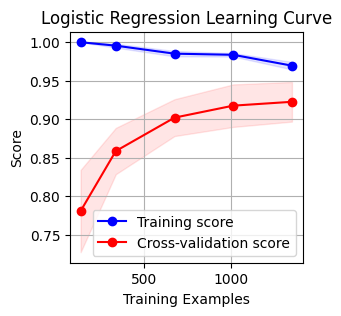

In [19]:
# Load the digits dataset
digits = load_digits()

# Split the data into features (X) and target (y)
X, y = digits.data, digits.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression classifier
logreg = LogisticRegression(max_iter=10)
logreg.fit(X_train, y_train)

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(logreg, X, y, train_sizes=[0.1, 0.25, 0.5, 0.75, 1.0], cv=4)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(3, 3))
plt.title("Logistic Regression Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation score")
plt.legend(loc="best")
plt.show()
